In [30]:
import calendar
import pandas as pd
import csv
import numpy as np
from scipy.stats import linregress
from matplotlib import pyplot as plt
import hvplot.pandas

wildfires_df = pd.read_csv("US_Lightning_Forest_Fires.csv")

In [31]:
del wildfires_df["STAT_CAUSE_DESCR"]
del wildfires_df["Unnamed: 0"]

In [32]:
wildfires_df.head()

,index,FIRE_YEAR,Fire_Date,DISCOVERY_TIME,Days_to_extinguish_fire,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,FIPS_CODE,FIPS_NAME
0,1,2004,05-12-2004,845.0,0.0,1530.0,0.25,A,38.933056,-120.404444,CA,61.0,Placer
1,3,2004,06-28-2004,1600.0,5.0,1400.0,0.10,A,38.559167,-119.913333,CA,3.0,Alpine
2,4,2004,06-28-2004,1600.0,5.0,1200.0,0.10,A,38.559167,-119.933056,CA,3.0,Alpine
3,5,2004,06-30-2004,1800.0,1.0,1600.0,0.10,A,38.635278,-120.103611,CA,5.0,Amador
4,6,2004,07-01-2004,1800.0,1.0,1400.0,0.10,A,38.688333,-120.153333,CA,17.0,El Dorado


In [33]:
tennessee_df = wildfires_df.loc[(wildfires_df["STATE"] == "TN"), :]

In [34]:
county_count = tennessee_df["FIPS_NAME"].value_counts()
county_name = county_count.index
county_occurences = county_count.values
x_axis = np.arange(len(county_name.unique()))
tick_locations = [value for value in x_axis]

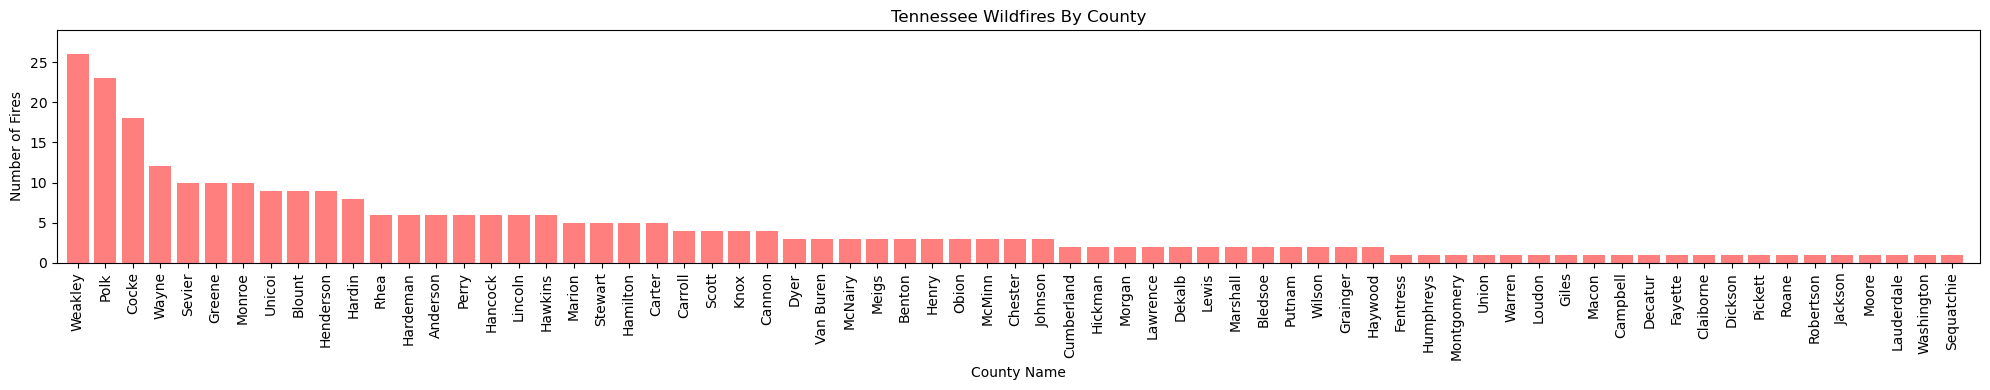

In [35]:
plt.figure(figsize=(20,4))
plt.bar(x_axis, county_occurences, color='r', alpha=0.5, align='center')
plt.xticks(tick_locations, county_name, rotation="vertical")
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(county_occurences)+3)
plt.title("Tennessee Wildfires By County")
plt.xlabel("County Name")
plt.ylabel("Number of Fires")
plt.tight_layout()
plt.savefig("tennessee_df.png")
plt.show()

In [36]:
tennessee_county_df = tennessee_df[["LATITUDE","LONGITUDE","FIPS_NAME","FIRE_YEAR","Fire_Date"]]

In [37]:
#coordinates = {
#    "year":tennessee_df["FIRE_YEAR"],
#    "latitude":tennessee_county_df["LATITUDE"],
#    "longitude":tennessee_county_df["LONGITUDE"],
#    "County":tennessee_county_df["FIPS_NAME"]
#}

In [38]:
#coordinates_df = pd.DataFrame(coordinates)
#for years in coordinates_df['year']:
#coordinates_df[coordinates_df['year'] == years]
#map_plot_1 = coordinates_df.hvplot.points(
        #"longitude",
        #"latitude",
        #geo = True,
        #tiles = "OSM",
        #frame_width = 900,
        #frame_height = 1440
#)
    #plt.savefig(f'map_{years}.png')

#map_plot_1

In [39]:
tennessee_county_df['FIPS_NAME'] = tennessee_county_df['FIPS_NAME'].fillna("No Name Given")
fire_count_year = tennessee_county_df["FIRE_YEAR"].value_counts().sort_index()
year = fire_count_year.index.sort_values()
x_axis = np.arange(len(year.unique()))
tick_locations = [value for value in x_axis]

C:\Users\Jolto\AppData\Local\Temp\ipykernel_6148\2886014794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tennessee_county_df['FIPS_NAME'] = tennessee_county_df['FIPS_NAME'].fillna("No Name Given")


In [40]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, fire_count_year)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
p_value = "p = " + str(round(pvalue,8))

C:\Users\Jolto\AppData\Local\Temp\ipykernel_6148\1947727062.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


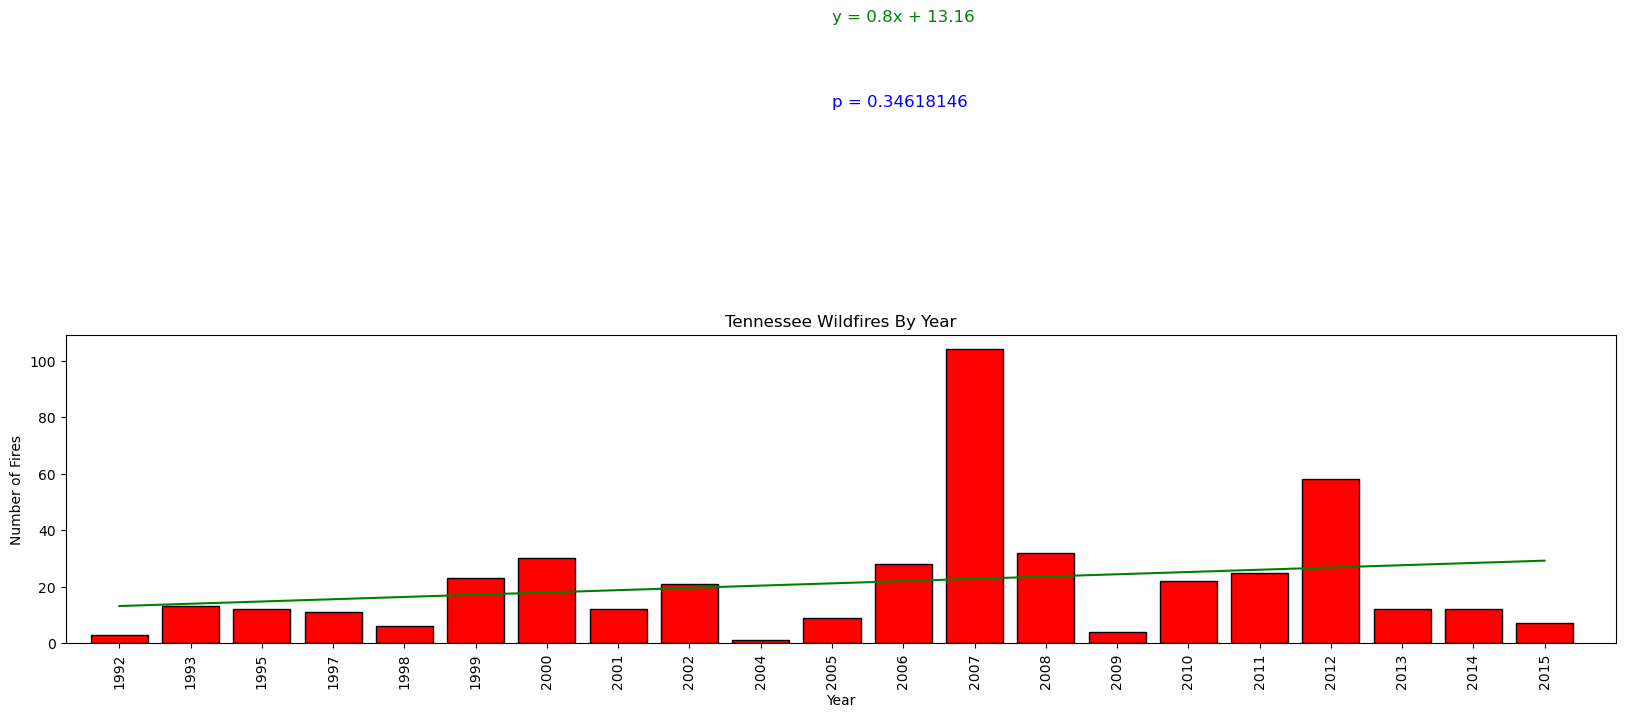

In [41]:
plt.figure(figsize=(20,4))
plt.bar(x_axis, fire_count_year, color='r', edgecolor='black')
plt.plot(x_axis, regress_values, "g-")
plt.text(10,220, line_eq, fontsize=12, color='green')
plt.text(10,190, p_value, fontsize=12, color='blue')
plt.xticks(tick_locations, year, rotation="vertical")
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(fire_count_year)+5)
plt.title("Tennessee Wildfires By Year")
plt.xlabel("Year")
plt.ylabel("Number of Fires")
plt.tight_layout()
plt.savefig("tennessee_year_fire.png")
plt.show()

In [42]:
tennessee_date_df = tennessee_county_df[['Fire_Date','FIPS_NAME']]
tennessee_date_df['Fire_Date'] = pd.to_datetime(tennessee_date_df['Fire_Date'], format='%m-%d-%Y')
tennessee_date_df.head()

C:\Users\Jolto\AppData\Local\Temp\ipykernel_6148\2935289609.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tennessee_date_df['Fire_Date'] = pd.to_datetime(tennessee_date_df['Fire_Date'], format='%m-%d-%Y')


,Fire_Date,FIPS_NAME
9187,2006-04-03,Greene
9193,2006-04-18,Unicoi
9194,2006-08-09,Unicoi
9195,2006-06-23,Cocke
13730,2007-06-19,Cocke


In [43]:
tennessee_date_df['month'] = tennessee_date_df['Fire_Date'].dt.month
tennessee_date_df['month'] = tennessee_date_df['month'].apply(lambda x: calendar.month_name[x])
tennessee_date_df.head()

C:\Users\Jolto\AppData\Local\Temp\ipykernel_6148\4126342420.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tennessee_date_df['month'] = tennessee_date_df['Fire_Date'].dt.month
C:\Users\Jolto\AppData\Local\Temp\ipykernel_6148\4126342420.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tennessee_date_df['month'] = tennessee_date_df['month'].apply(lambda x: calendar.month_name[x])


,Fire_Date,FIPS_NAME,month
9187,2006-04-03,Greene,April
9193,2006-04-18,Unicoi,April
9194,2006-08-09,Unicoi,August
9195,2006-06-23,Cocke,June
13730,2007-06-19,Cocke,June


In [44]:
months_categories = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
tennessee_date_df["month"] = pd.Categorical(tennessee_date_df["month"], categories = months_categories)
tennessee_date_df.sort_values(by = "month")

C:\Users\Jolto\AppData\Local\Temp\ipykernel_6148\1078561699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tennessee_date_df["month"] = pd.Categorical(tennessee_date_df["month"], categories = months_categories)


,Fire_Date,FIPS_NAME,month
241766,2012-01-30,Polk,January
245663,2012-01-17,Carroll,January
191002,1997-01-06,No Name Given,January
160252,2006-01-06,No Name Given,January
176695,2006-01-13,Hardeman,January
...,...,...,...
221463,2007-11-21,Benton,November
245727,2012-11-25,Perry,November
224871,2005-11-15,Hardin,November
221462,2007-11-21,Obion,November


In [45]:
fire_count_month = tennessee_date_df["month"].value_counts().sort_index()
month = fire_count_month.index.sort_values()
x_axis = np.arange(len(month.unique()))
tick_locations = [value for value in x_axis]

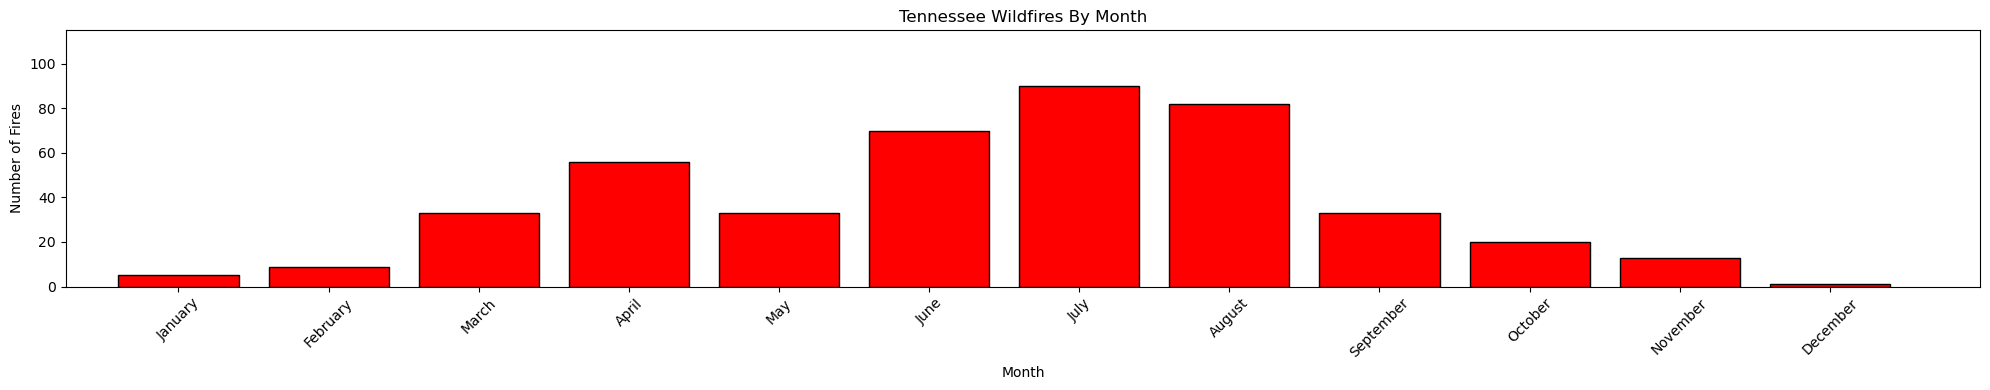

In [46]:
plt.figure(figsize=(20,4))
plt.bar(x_axis, fire_count_month, color='red', edgecolor='black')
plt.xticks(tick_locations, month, rotation=45)
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(fire_count_month)+25)
plt.title("Tennessee Wildfires By Month")
plt.xlabel("Month")
plt.ylabel("Number of Fires")
plt.tight_layout()
plt.savefig("tennessee_month_fire.png")
plt.show()